In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from scikeras.wrappers import KerasClassifier
from joblib import parallel_backend

from sklearn import svm
from sklearn.svm import SVC
from scipy.stats import uniform

from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score, roc_auc_score, f1_score,make_scorer,classification_report,confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder ,StandardScaler
from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv("cancer.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [3]:
missing_values = df.isnull().sum()
missing_values

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [4]:
df = df.drop(['id', 'Unnamed: 32'], axis=1)

In [5]:
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

In [6]:
y = df['diagnosis']
x = df.drop('diagnosis', axis = 1)
print(x.shape)
print(y.shape)

(569, 30)
(569,)


In [7]:
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
x.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
print(y.value_counts())

diagnosis
0    357
1    212
Name: count, dtype: int64


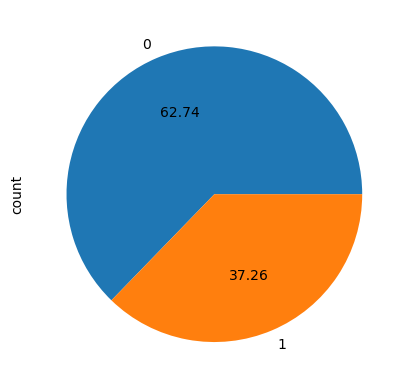

In [10]:
y.value_counts().plot.pie(autopct = '%.2f')
plt.show()

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 42)
print(f'train samples:{len(x_train)}')
print(f'test samples:{len(x_test)}')

train samples:398
test samples:171


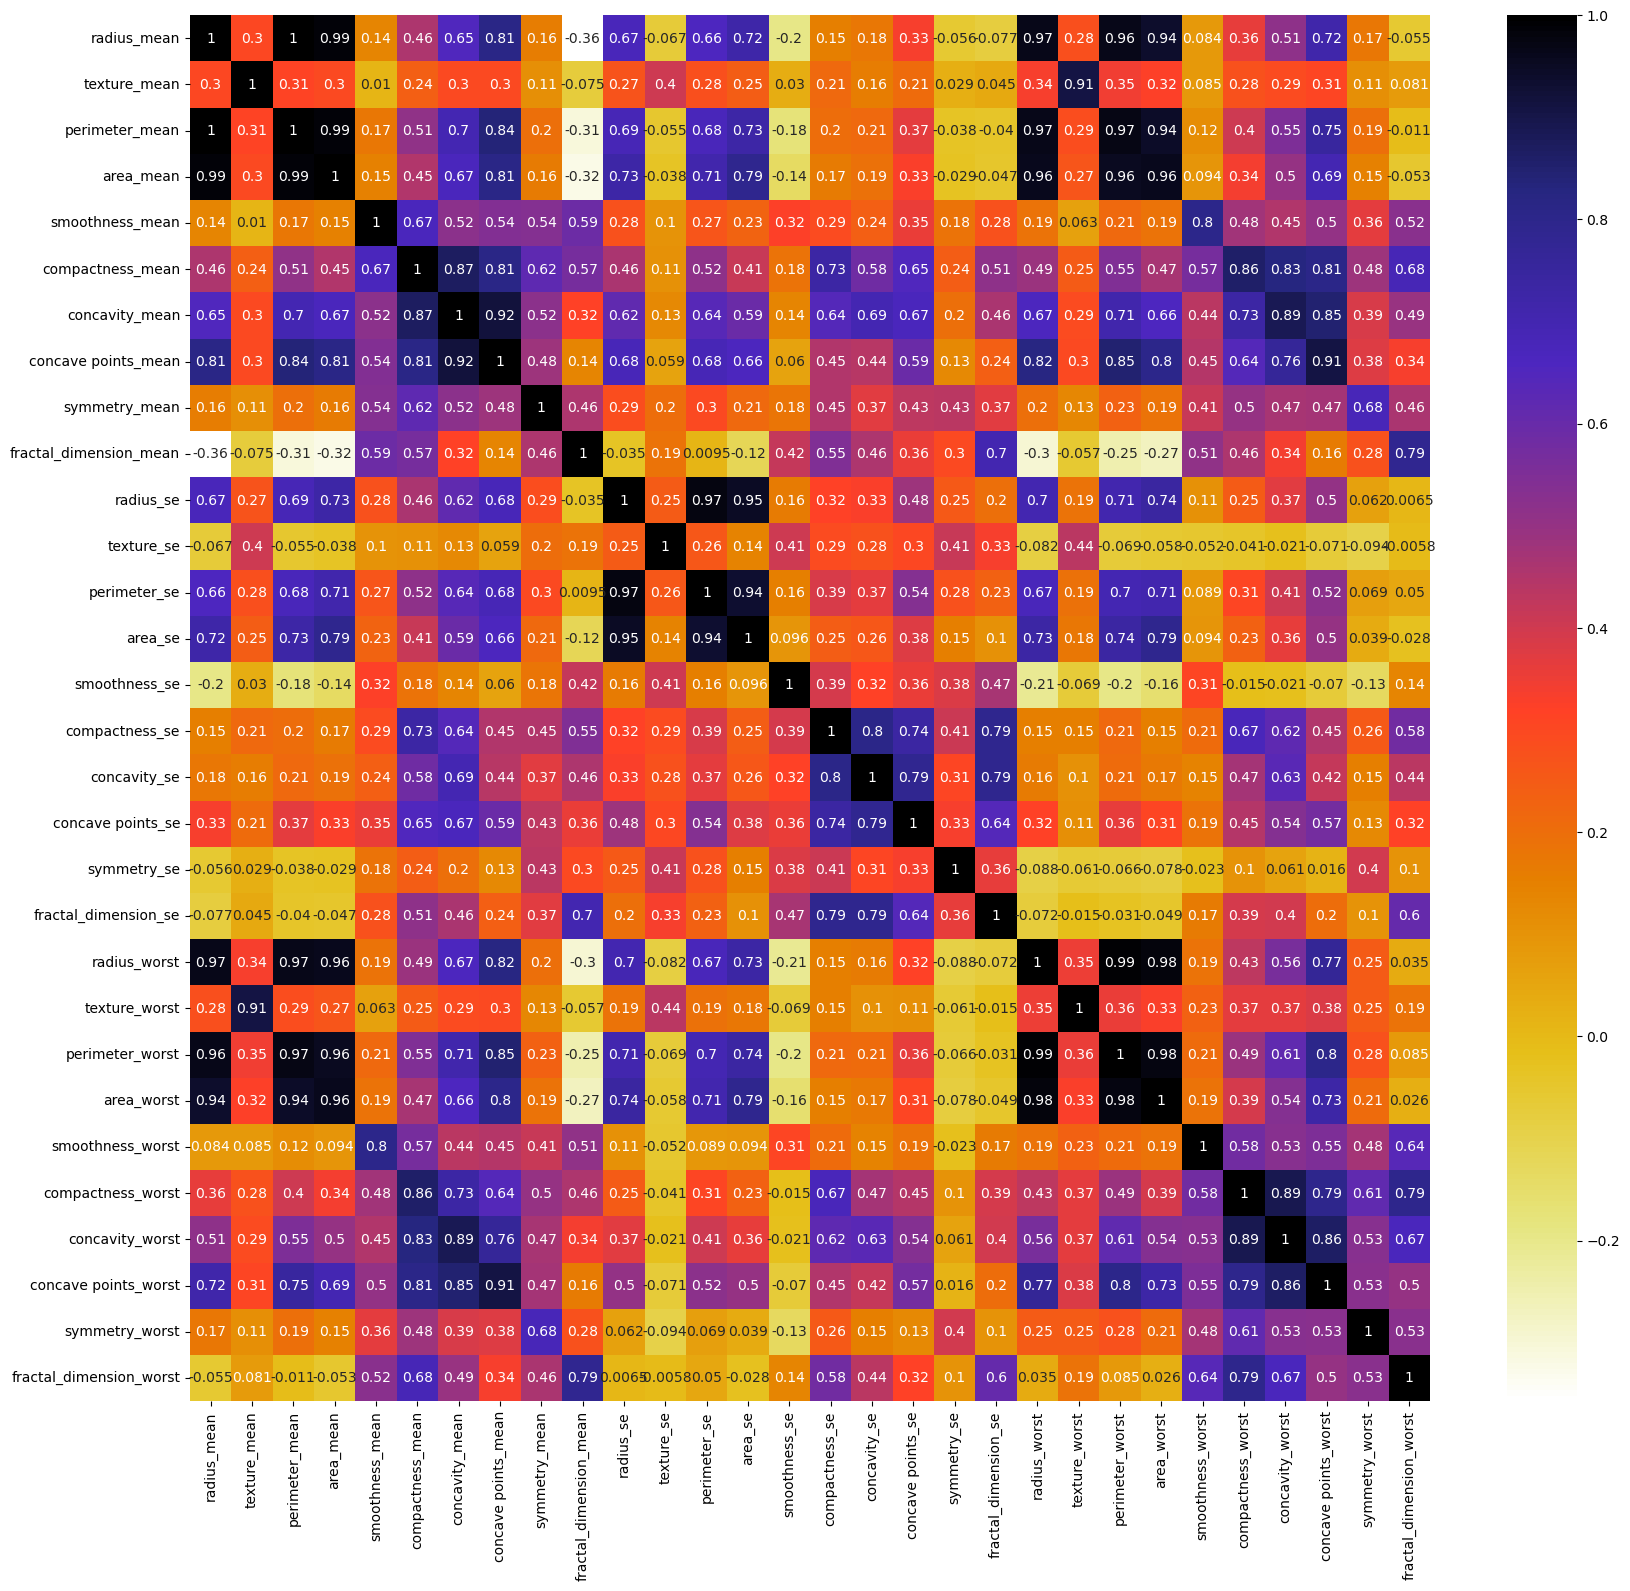

In [12]:
# person correlation
plt.figure(figsize = (20,18))
corr = x_train.corr()
sns.heatmap(corr, annot = True ,cmap = plt.cm.CMRmap_r)
plt.show()

In [13]:
col_corr = set()
for i in range(len(corr.columns)):
    for j in range(i):
        if corr.iloc[i,j] > 0.85: 
            colname = corr.columns[i]
            col_corr.add(colname)
col_corr

{'area_mean',
 'area_se',
 'area_worst',
 'compactness_worst',
 'concave points_mean',
 'concave points_worst',
 'concavity_mean',
 'concavity_worst',
 'perimeter_mean',
 'perimeter_se',
 'perimeter_worst',
 'radius_worst',
 'texture_worst'}

In [14]:
x_train = x_train.drop(col_corr, axis = 1)
x_test = x_test.drop(col_corr,axis = 1)

In [15]:
print(y_train.value_counts())

diagnosis
0    249
1    149
Name: count, dtype: int64


In [16]:
sm = SMOTE(random_state =42)
x_res,y_res = sm.fit_resample(x_train,y_train)

In [17]:
print(y_res.value_counts())

diagnosis
0    249
1    249
Name: count, dtype: int64


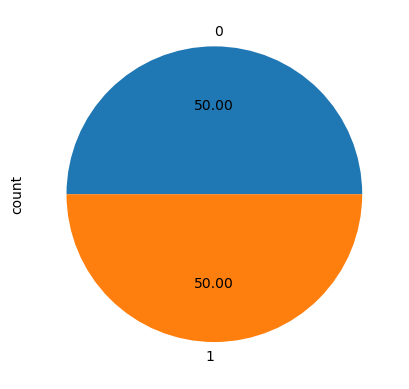

In [18]:
y_res.value_counts().plot.pie(autopct = '%.2f')
plt.show()

In [19]:
scaler = StandardScaler()
x_res_scaled = scaler.fit_transform(x_res)
x_test_scaled = scaler.transform(x_test)

In [20]:
#FeedForward Network 

In [21]:
def create_nn(n_layers, units, dropout_rate, activation='relu'):
    model = Sequential()  
    model.add(Dense(units, activation=activation, input_shape=(x_res_scaled.shape[1],)))
    model.add(Dropout(dropout_rate))
    
    for i in range(n_layers):
        current_units = units // (2 ** (i + 1))  
        model.add(Dense(current_units, activation=activation))
        model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))  
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [22]:
param_grid = {
    'model__n_layers': [1, 2, 3],
    'model__units': [32, 64, 128],
    'model__dropout_rate': [0.3, 0.4, 0.5],
    'batch_size': [16, 32],
    'epochs': [40, 50, 60]
}

model = KerasClassifier(
    model=create_nn,  
    verbose=1
)

grid_search = GridSearchCV(
    estimator = model,
    param_grid = param_grid,  
    cv = 5,
    verbose = 1,
    n_jobs = -1
)
grid_search.fit(x_res_scaled, y_res)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)
best_model = grid_search.best_estimator_
y_pred_mlp = best_model.predict(x_test_scaled)
print(classification_report(y_test, y_pred_mlp))
print("Accuracy:", accuracy_score(y_test, y_pred_mlp))

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Epoch 1/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5327 - loss: 0.7405
Epoch 2/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6696 - loss: 0.6364 
Epoch 3/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7503 - loss: 0.5463 
Epoch 4/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8024 - loss: 0.4842 
Epoch 5/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8552 - loss: 0.3978 
Epoch 6/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8740 - loss: 0.2914 
Epoch 7/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9334 - loss: 0.2149 
Epoch 8/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9227 - loss: 0.2063 
Epoch 9/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9409 - loss: 0.1837 
Epoch 10/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9627 - loss: 0.1497 
Epoch 11/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9457 - loss: 0.1553 
E

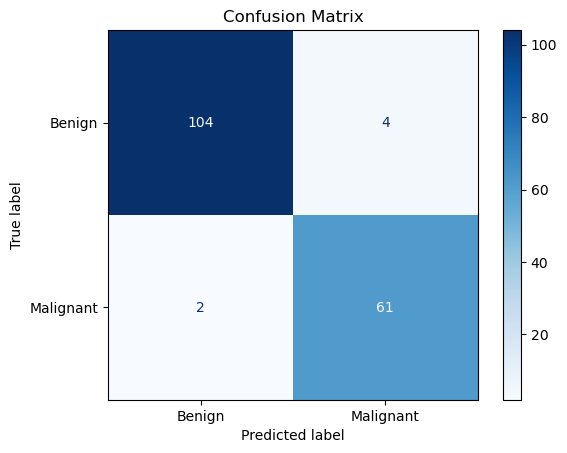

In [23]:
cm = confusion_matrix(y_test, y_pred_mlp)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Malignant"])
display.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


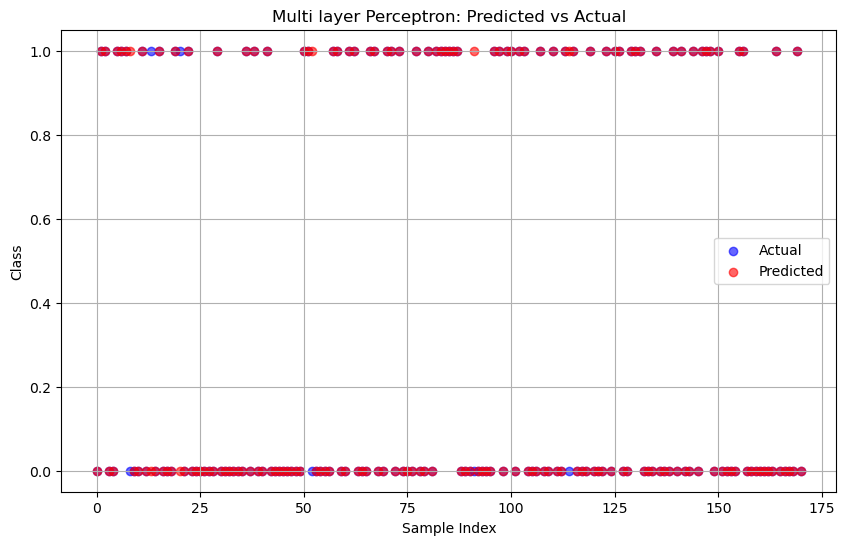

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual', alpha=0.6)
plt.scatter(range(len(y_test)), y_pred_mlp, color='red', label='Predicted', alpha=0.6)
plt.title('Multi layer Perceptron: Predicted vs Actual')
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.legend()
plt.grid()
plt.show()

In [25]:
#Ensemble Learning Technique 

In [29]:
parameters = {
    'n_estimators': np.arange(50, 150, 10),
    'max_depth': [2, 3, 4, 5, 6],
    'min_samples_split': [20, 30, 40, 50],
    'min_samples_leaf': [10, 15, 20, 25]
}
scorers = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision': make_scorer(precision_score,average='macro'),
    'Recall': make_scorer(recall_score,average='macro'),
    'F1': make_scorer(f1_score,average='macro'),
    'ROC_AUC': make_scorer(roc_auc_score)
}
results = []
for scorer_name,scorer in scorers.items():
    print(f'\nRunning GridSearchCV with {scorer_name} scorer')
    grid_search = GridSearchCV(
        RandomForestClassifier(random_state=42),
        parameters,
        scoring = scorer,
        cv=10,
        n_jobs=-1
    )
    grid_search = grid_search.fit(x_res_scaled,y_res)

    randomForest = grid_search.best_estimator_
    
    results.append(randomForest)
    
    y_pred_randomforest = randomForest.predict(x_test_scaled)

    print("Best Hyperparameters:", grid_search.best_params_)
    print("\nTest Set Performance:")
    print(classification_report(y_test, y_pred_randomforest))


Running GridSearchCV with Accuracy scorer
Best Hyperparameters: {'max_depth': 6, 'min_samples_leaf': 10, 'min_samples_split': 20, 'n_estimators': 130}

Test Set Performance:
              precision    recall  f1-score   support

           0       0.99      0.94      0.96       108
           1       0.90      0.98      0.94        63

    accuracy                           0.95       171
   macro avg       0.94      0.96      0.95       171
weighted avg       0.96      0.95      0.95       171


Running GridSearchCV with Precision scorer
Best Hyperparameters: {'max_depth': 6, 'min_samples_leaf': 10, 'min_samples_split': 20, 'n_estimators': 130}

Test Set Performance:
              precision    recall  f1-score   support

           0       0.99      0.94      0.96       108
           1       0.90      0.98      0.94        63

    accuracy                           0.95       171
   macro avg       0.94      0.96      0.95       171
weighted avg       0.96      0.95      0.95       

In [30]:
y_pred_randomforest_train = results[2].predict(x_res_scaled)
print(classification_report(y_res, y_pred_randomforest_train))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       249
           1       0.98      0.97      0.97       249

    accuracy                           0.97       498
   macro avg       0.97      0.97      0.97       498
weighted avg       0.97      0.97      0.97       498



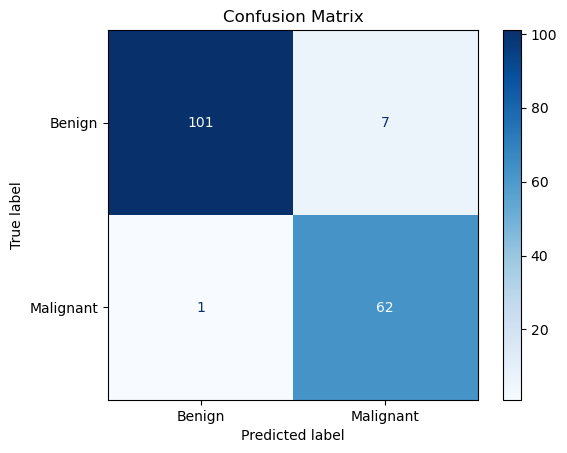

In [31]:
y_pred_randomforest = results[2].predict(x_test_scaled)
cm = confusion_matrix(y_test, y_pred_randomforest)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Malignant"])
display.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

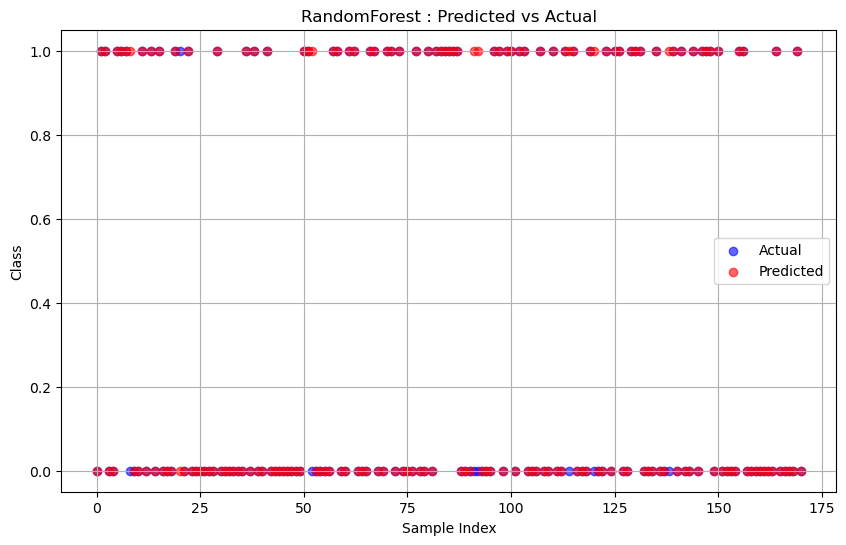

In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual', alpha=0.6)
plt.scatter(range(len(y_test)), y_pred_randomforest, color='red', label='Predicted', alpha=0.6)
plt.title('RandomForest : Predicted vs Actual')
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.legend()
plt.grid()
plt.show()

In [33]:
# support vector machine 

In [38]:
param_dist = {
    'C': uniform(0.1, 10),       
    'gamma': uniform(0.01, 1),   
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4]          
}
clf = svm.SVC( gamma='scale')

clf.fit(x_res_scaled, y_res)
y_pred_svm = clf.predict(x_test_scaled)
random_search = RandomizedSearchCV(
    estimator=clf,
    param_distributions=param_dist,
    n_iter=50,          
    cv=5,              
    verbose=2,
    random_state=42,
    scoring='accuracy'     
)
    
random_search.fit(x_res_scaled, y_res)
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Score:", random_search.best_score_)

best_model_svm = random_search.best_estimator_
y_pred_svm = best_model_svm.predict(x_test_scaled)

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END C=3.845401188473625, degree=2, gamma=0.1934347898661638, kernel=linear; total time=   0.0s
[CV] END C=3.845401188473625, degree=2, gamma=0.1934347898661638, kernel=linear; total time=   0.0s
[CV] END C=3.845401188473625, degree=2, gamma=0.1934347898661638, kernel=linear; total time=   0.0s
[CV] END C=3.845401188473625, degree=2, gamma=0.1934347898661638, kernel=linear; total time=   0.0s
[CV] END C=3.845401188473625, degree=2, gamma=0.1934347898661638, kernel=linear; total time=   0.0s
[CV] END C=6.068501579464869, degree=3, gamma=0.16599452033620266, kernel=poly; total time=   0.0s
[CV] END C=6.068501579464869, degree=3, gamma=0.16599452033620266, kernel=poly; total time=   0.0s
[CV] END C=6.068501579464869, degree=3, gamma=0.16599452033620266, kernel=poly; total time=   0.0s
[CV] END C=6.068501579464869, degree=3, gamma=0.16599452033620266, kernel=poly; total time=   0.0s
[CV] END C=6.068501579464869, degree=3, ga

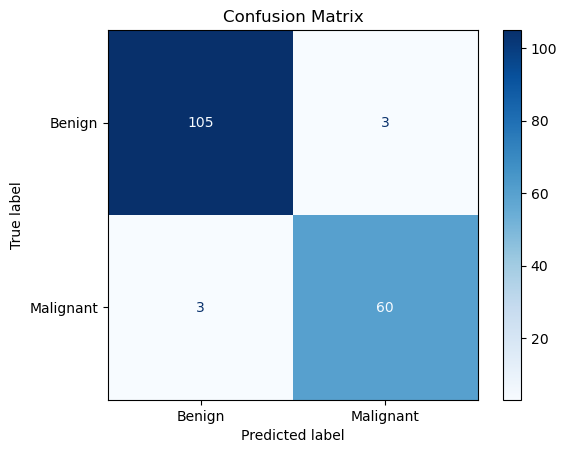

In [39]:
cm = confusion_matrix(y_test, y_pred_svm)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Malignant"])
display.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

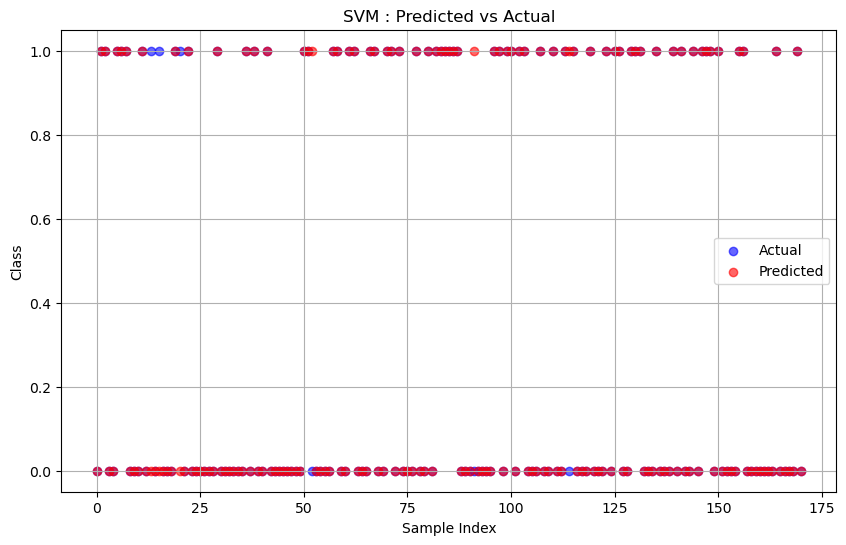

In [40]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual', alpha=0.6)
plt.scatter(range(len(y_test)), y_pred_svm, color='red', label='Predicted', alpha=0.6)
plt.title('SVM : Predicted vs Actual')
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.legend()
plt.grid()
plt.show()

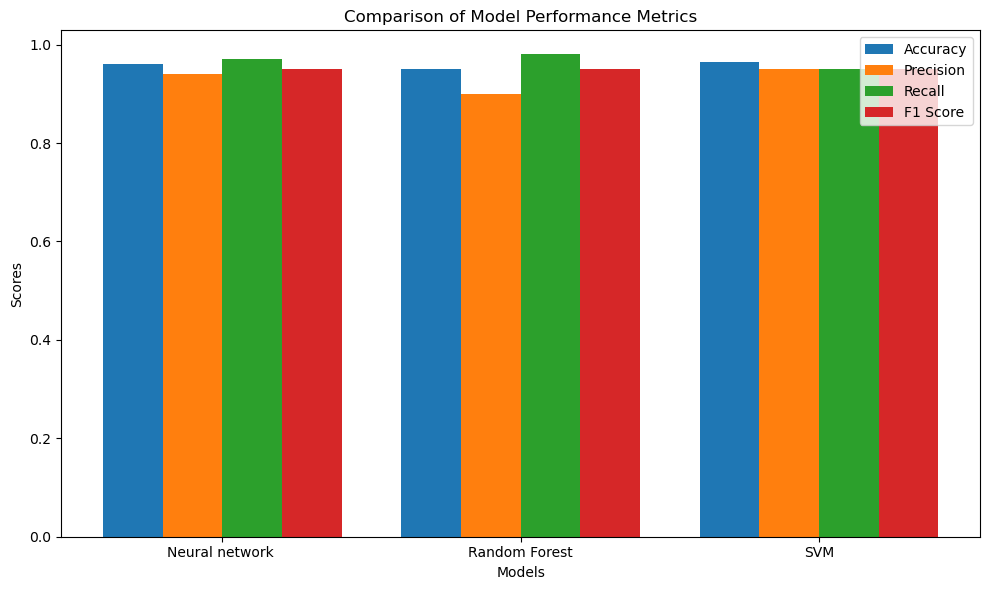

In [43]:
models = ['Neural network ', 'Random Forest', 'SVM']
accuracy = [0.96, 0.95, 0.965]
precision = [0.94, 0.90, 0.95]
recall = [0.97, 0.98, 0.95]
f1_score = [0.95, 0.95, 0.95]

bar_width = 0.2
x = np.arange(len(models))

plt.figure(figsize=(10, 6))
plt.bar(x - bar_width, accuracy, width=bar_width, label='Accuracy')
plt.bar(x, precision, width=bar_width, label='Precision')
plt.bar(x + bar_width, recall, width=bar_width, label='Recall')
plt.bar(x + 2 * bar_width, f1_score, width=bar_width, label='F1 Score')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Comparison of Model Performance Metrics')
plt.xticks(x + bar_width / 2, models)
plt.legend()
plt.tight_layout()

plt.show()
